In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
data = pd.read_csv('data\concrete.csv')
print(data.shape)
data.head()

(1030, 9)


<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\lebed\AppData\Local\Temp\ipykernel_19112\1949177760.py:1: SyntaxWarning: invalid escape sequence '\c'
  data = pd.read_csv('data\concrete.csv')


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# Data examination
Columns description:  
Cement - measured in kg in a m3 mixture  
Slag (blast furnace slag) - measured in kg in a m3 mixture  
Ash (fly ash) - measured in kg in a m3 mixture  
Water - measured in kg in a m3 mixture  
Superplastic (superplasticizer) - measured in kg in a m3 mixture  
Coarseagg (coarse aggregate) - measured in kg in a m3 mixture  
Fineagg (fine aggregate) - measured in kg in a m3 mixture  
Age - day (1-365)  
Strength (concrete compressive strength) - measured in MPa  

For the examination, I'll check:
1. Missing values
2. Distribution of data
3. Identify and remove potential outliers

In [12]:
data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [13]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


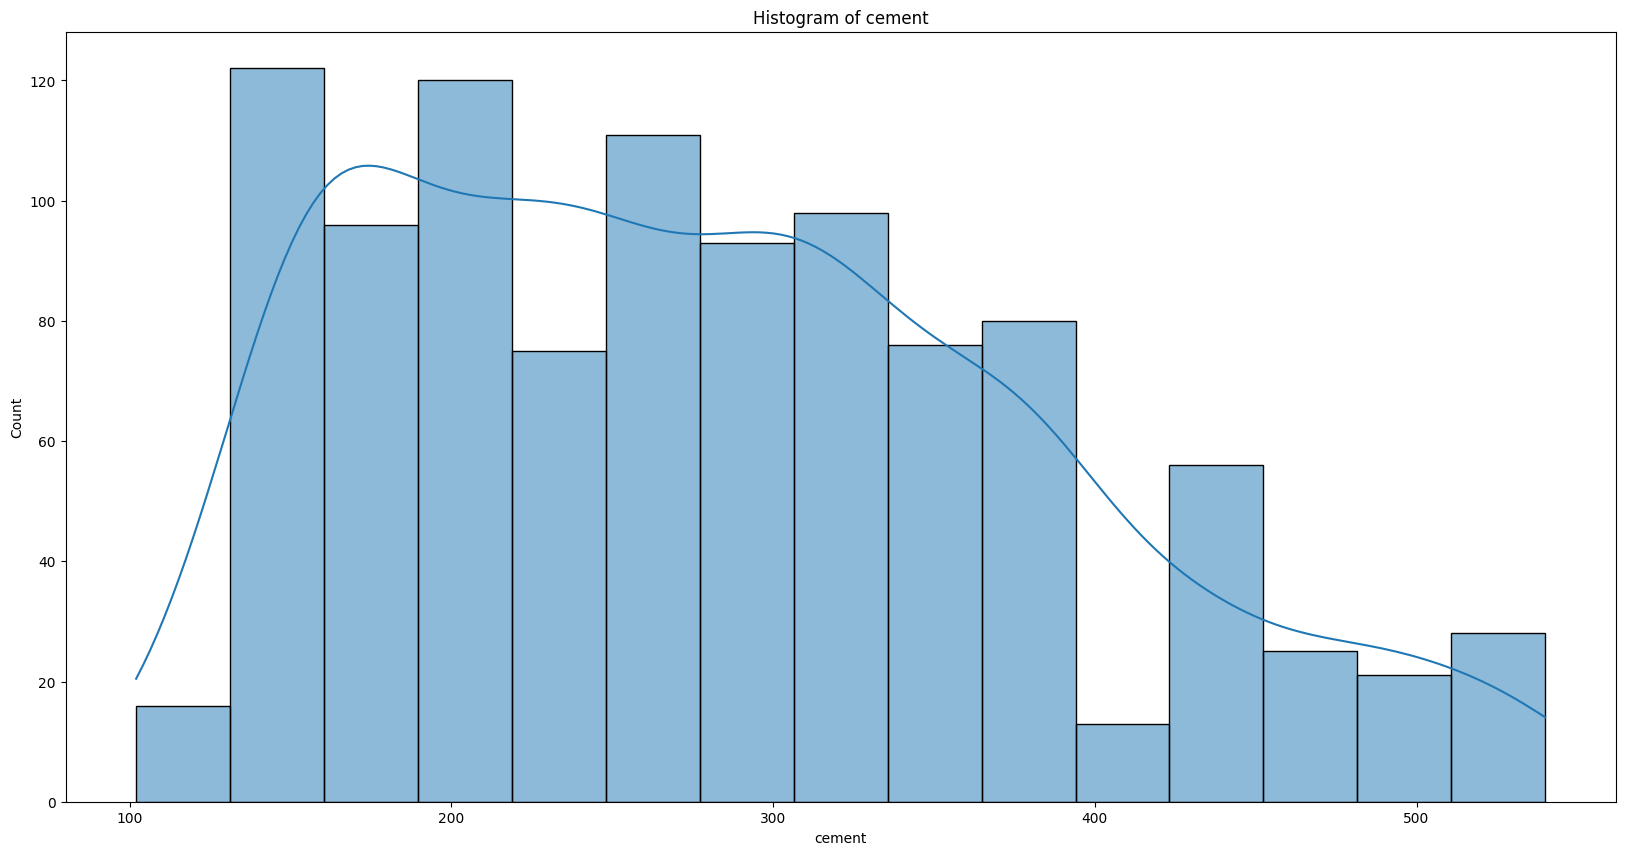

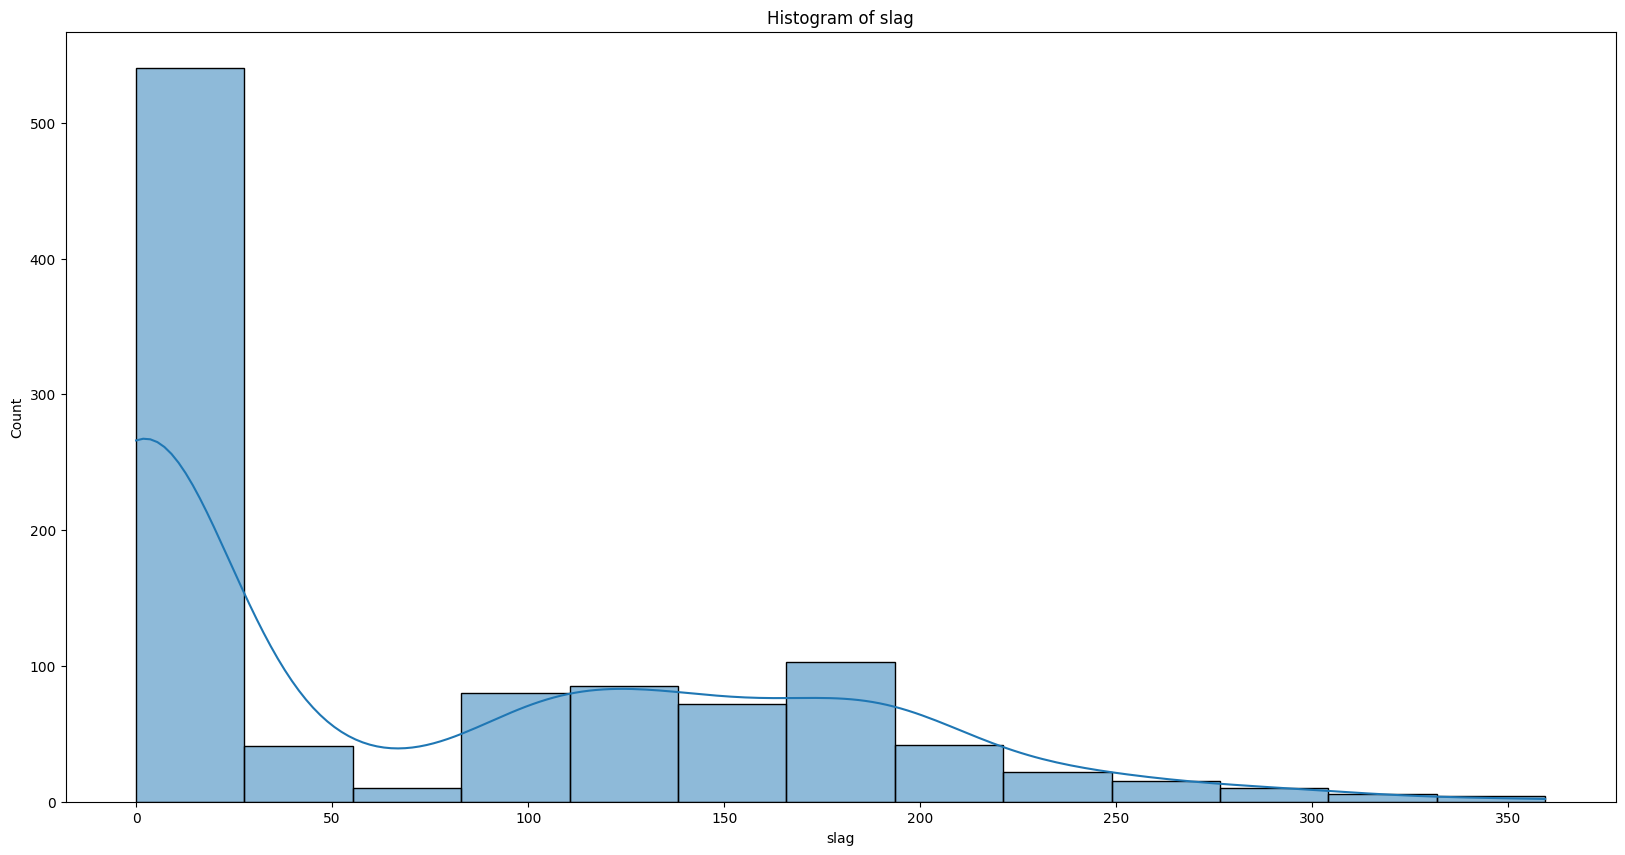

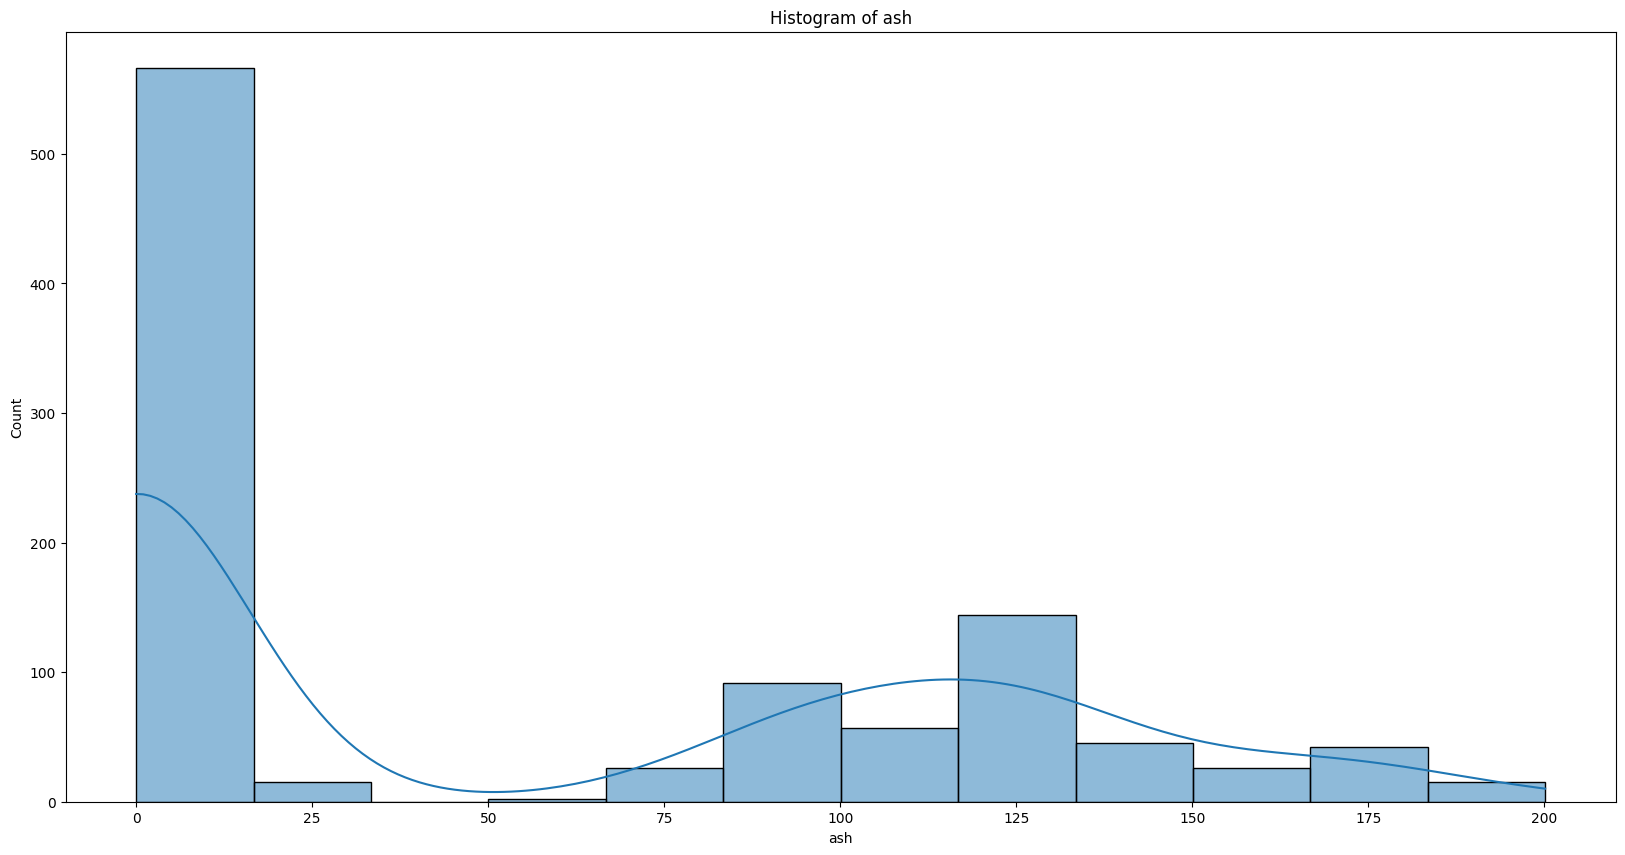

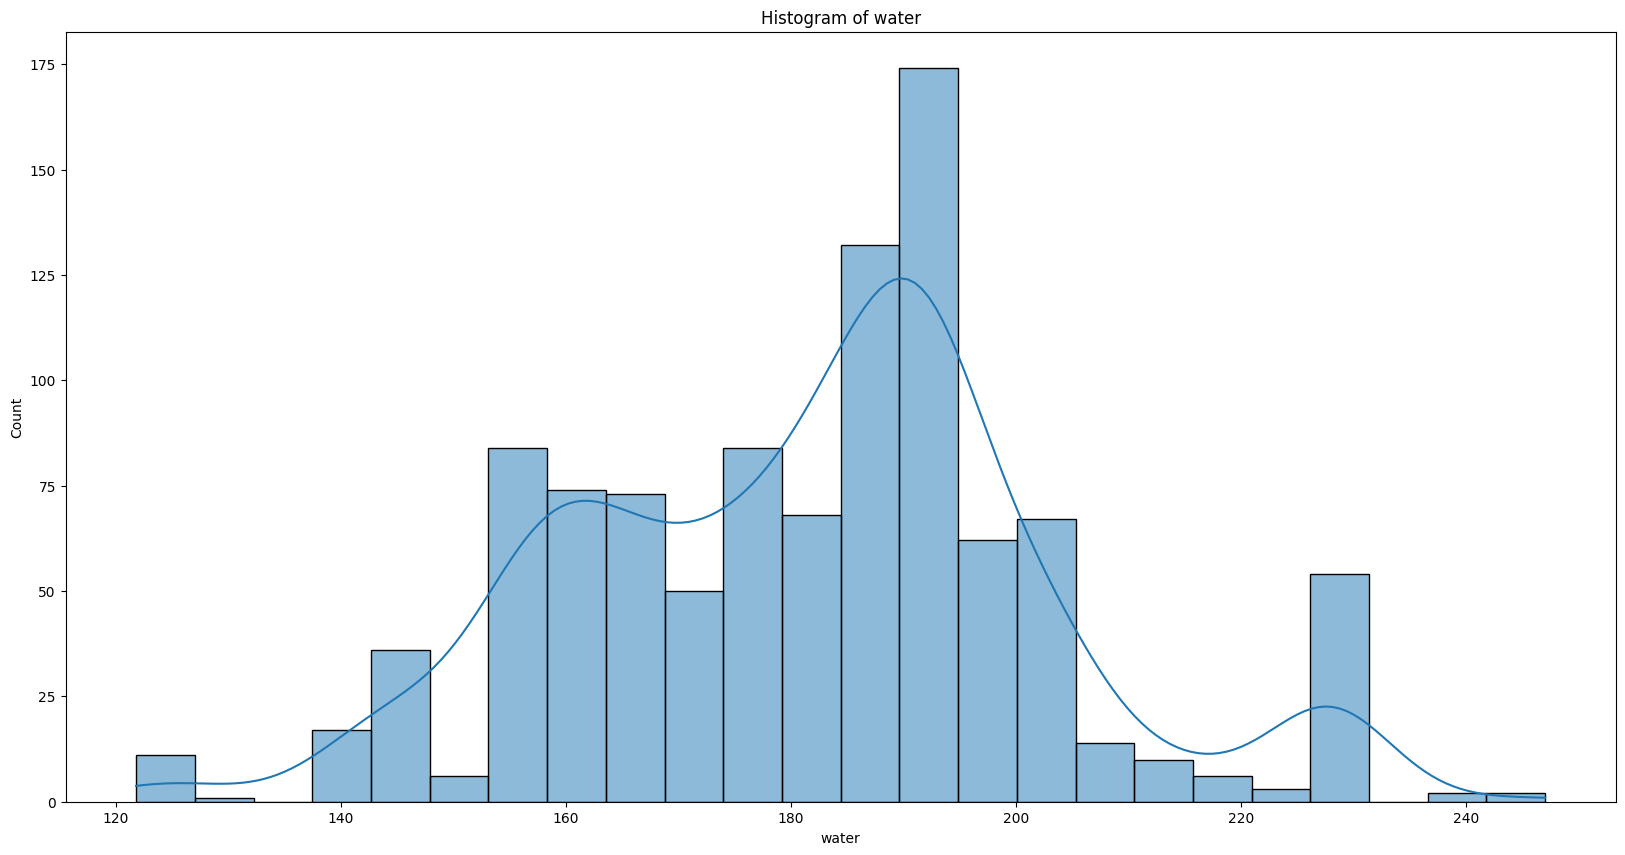

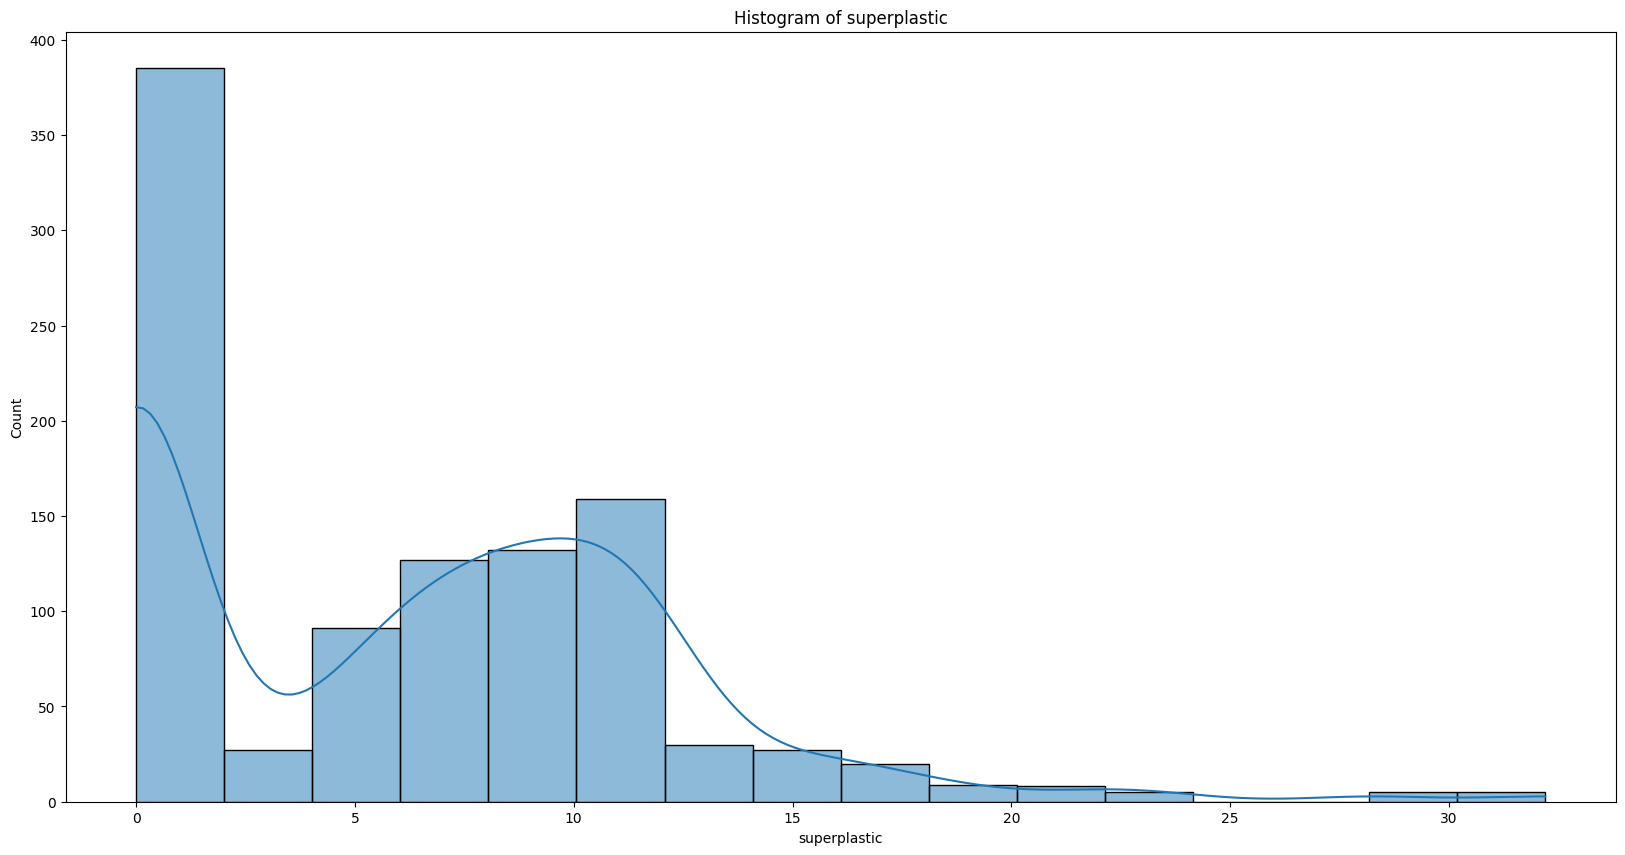

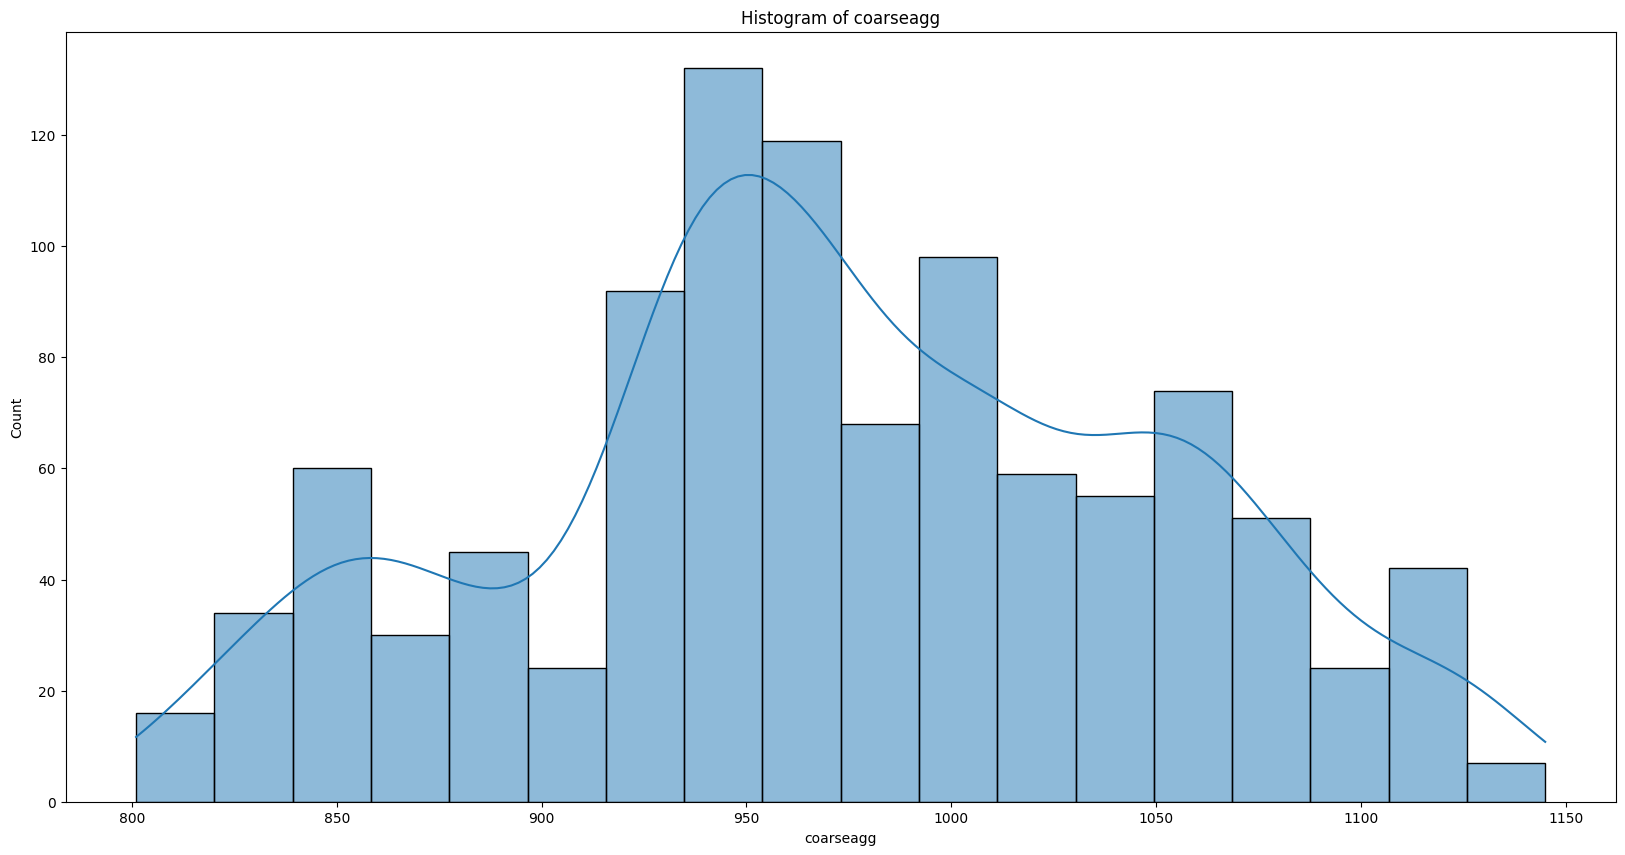

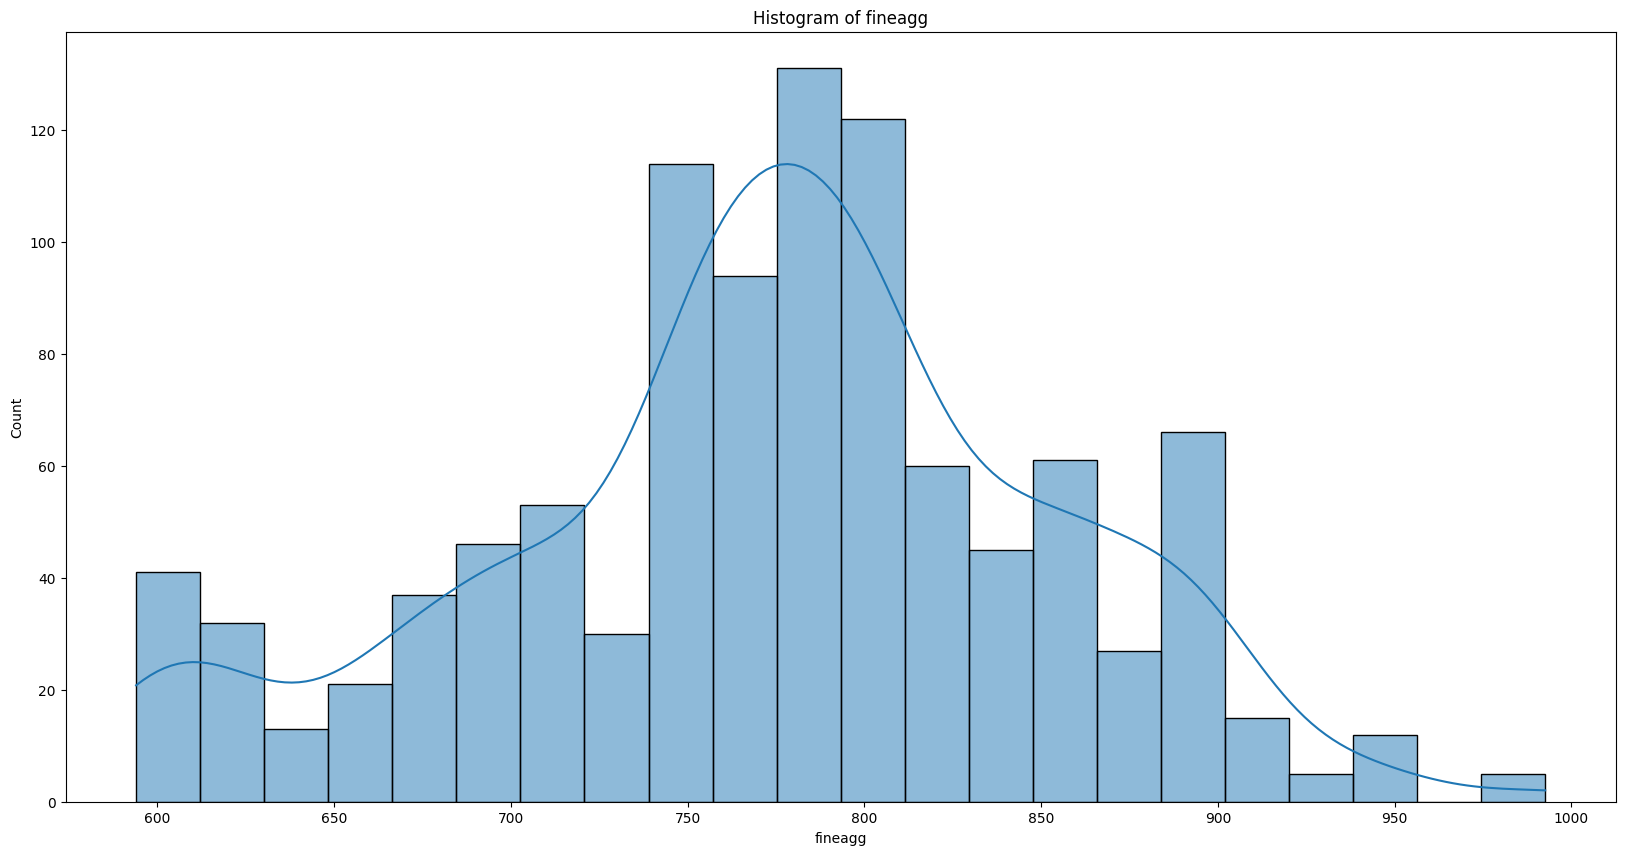

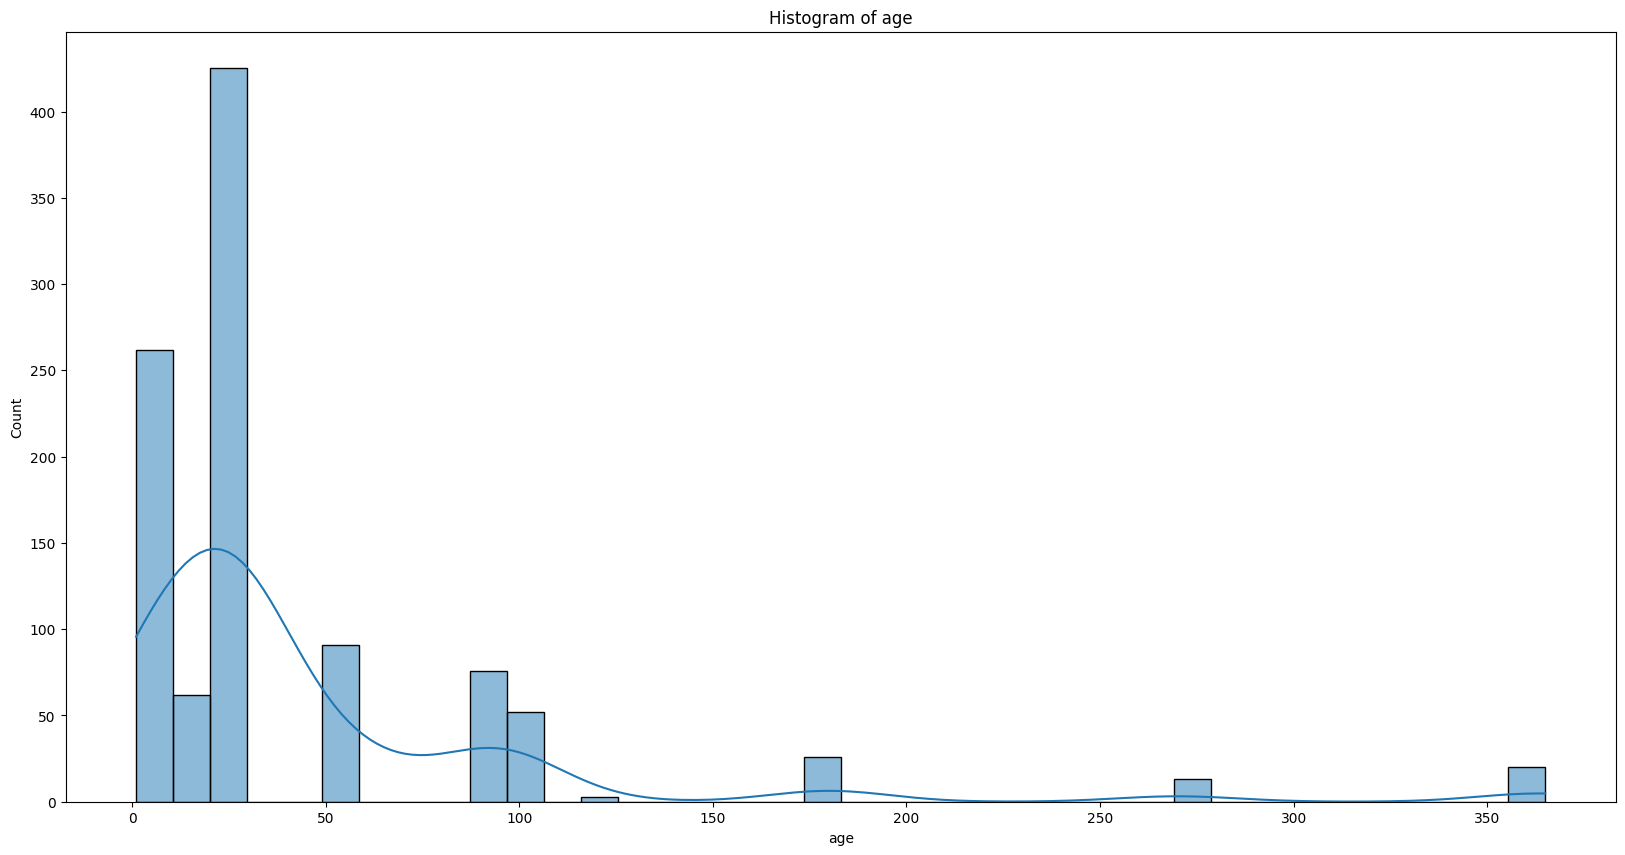

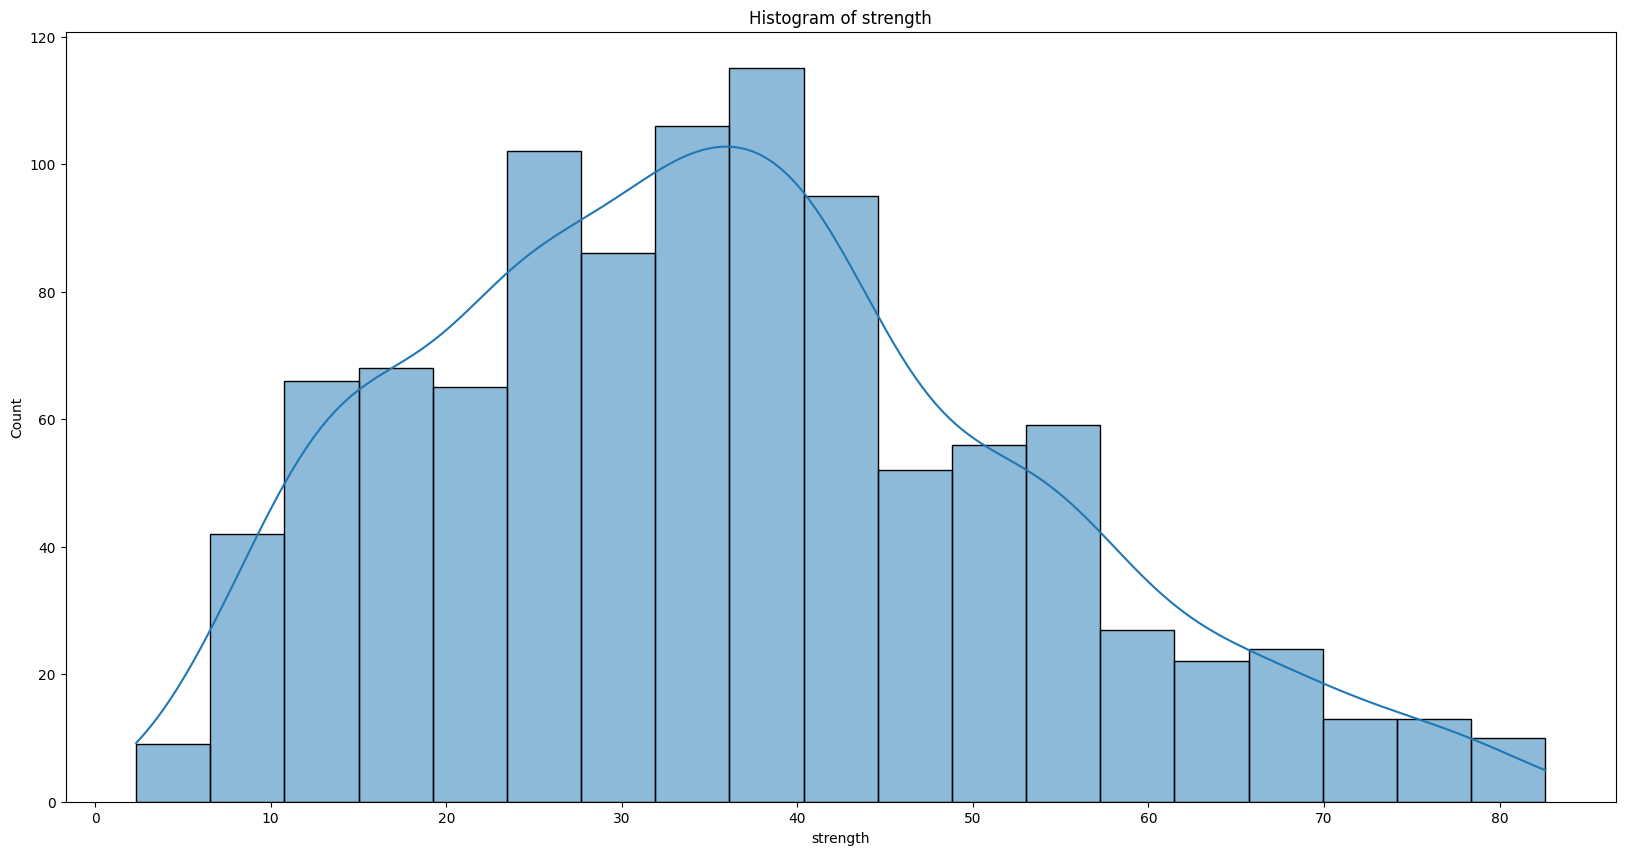

In [22]:
plt.figure(figsize=(20,10))
plt.title('Histogram of cement')
sns.histplot(data=data,x='cement', kde=True);

plt.figure(figsize=(20,10))
plt.title('Histogram of slag')
sns.histplot(data=data,x='slag', kde=True);

plt.figure(figsize=(20,10))
plt.title('Histogram of ash')
sns.histplot(data=data,x='ash', kde=True);

plt.figure(figsize=(20,10))
plt.title('Histogram of water')
sns.histplot(data=data,x='water', kde=True);

plt.figure(figsize=(20,10))
plt.title('Histogram of superplastic')
sns.histplot(data=data,x='superplastic', kde=True);

plt.figure(figsize=(20,10))
plt.title('Histogram of coarseagg')
sns.histplot(data=data,x='coarseagg', kde=True);

plt.figure(figsize=(20,10))
plt.title('Histogram of fineagg')
sns.histplot(data=data,x='fineagg', kde=True);

plt.figure(figsize=(20,10))
plt.title('Histogram of age')
sns.histplot(data=data,x='age', kde=True);

plt.figure(figsize=(20,10))
plt.title('Histogram of strength')
sns.histplot(data=data,x='strength', kde=True);

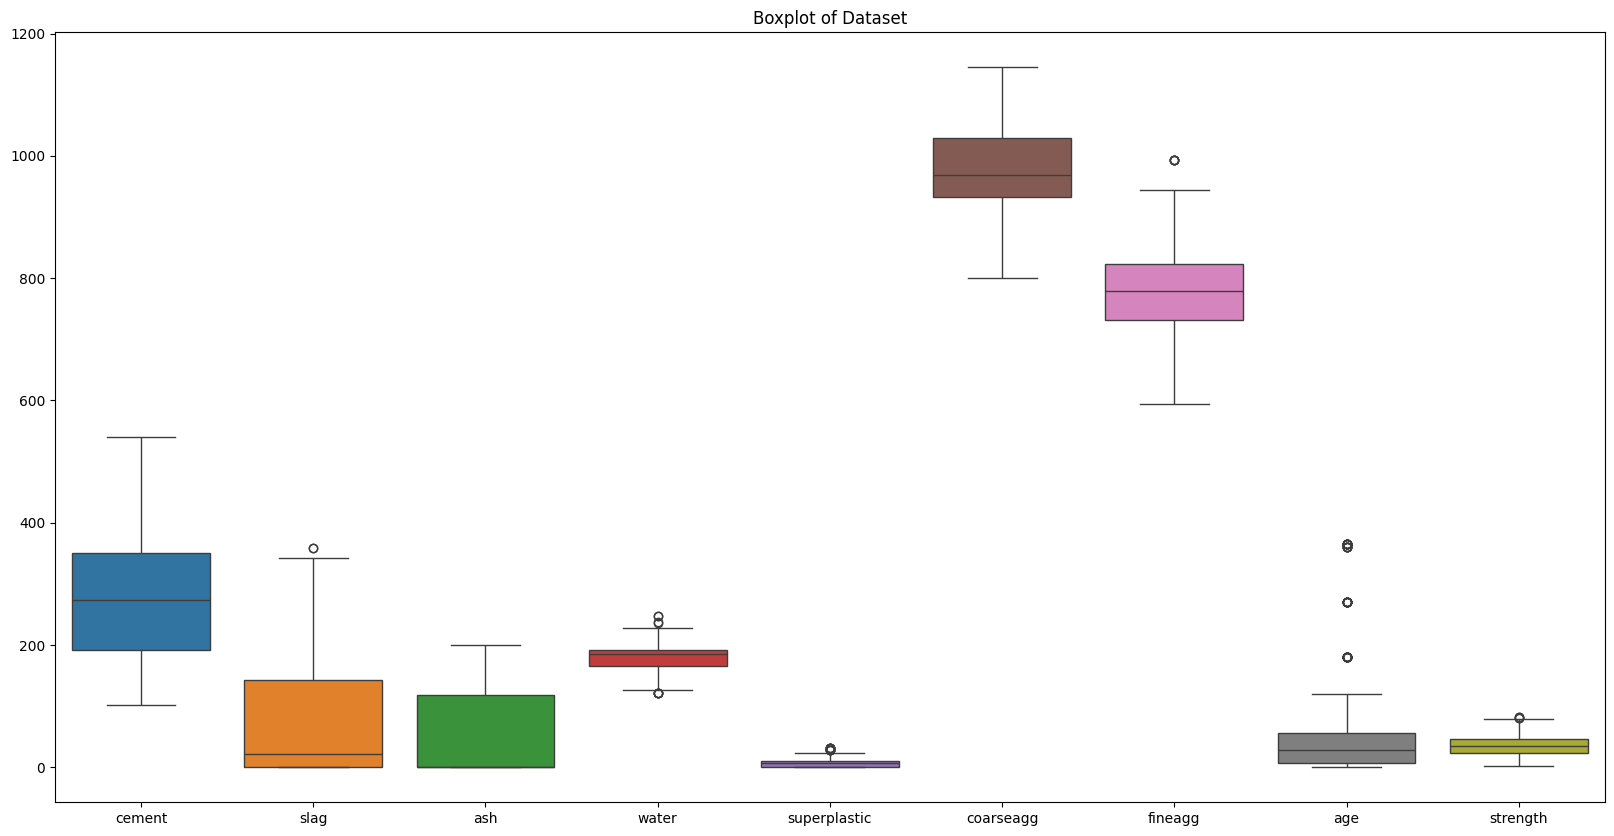

In [19]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of Dataset')
sns.boxplot(data=data);

There are a few outliers in certain features:
* slag
* water
* superplastic
* age 

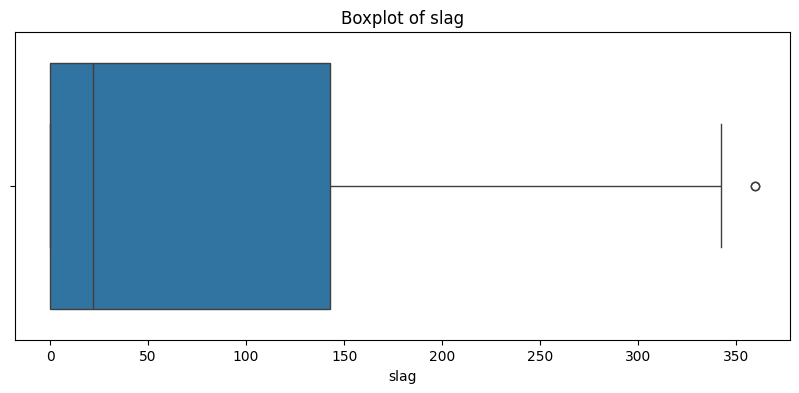

In [24]:
plt.figure(figsize=(10,4))
plt.title('Boxplot of slag')
sns.boxplot(data=data, x='slag');

In [29]:
data[data['slag'] > 350] # 2 values, we can drop them
data = data.loc[data['slag'] < 350]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


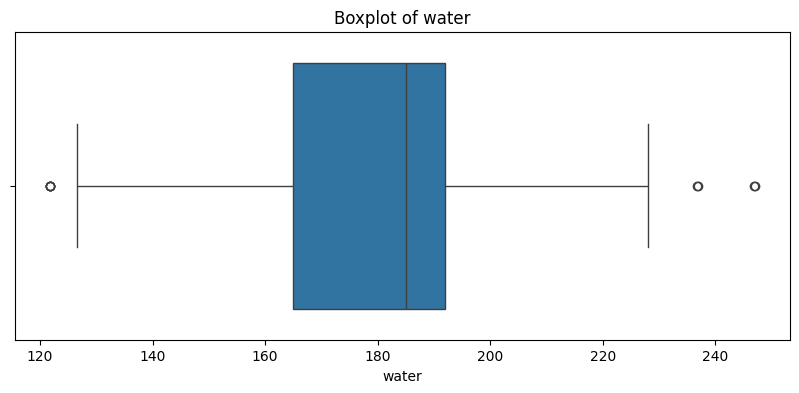

In [33]:
plt.figure(figsize=(10,4))
plt.title('Boxplot of water')
sns.boxplot(data=data, x='water');

In [39]:
data[(data['water'] > 230) | (data['water'] < 125)]
data = data.loc[(data['water'] > 125) | (data['water'] < 230)]